In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

/var/folders/4h/6_x41ljs40b6qtydhdtdtx280000gn/T/ipykernel_5258/2829297590.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [51]:
import io
import requests

In [4]:
amp = pd.read_csv("AMP.csv")
hsic = pd.read_csv("HSIC.csv")
iqv = pd.read_csv("IQV.csv")
jbht = pd.read_csv("JBHT.csv")
ual = pd.read_csv("UAL.csv")

companies = {"amp": amp, "hsic": hsic, "iqv": iqv, "jbht": jbht, "ual": ual}

In [7]:
for df in companies.values():
    df["Date"] = pd.to_datetime(df["Date"])
    print(df.Date.dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [8]:
amp

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-11-13,157.770004,155.529999,156.050003,157.320007,580500.0,140.493591
1,2017-11-14,157.330002,155.070007,156.179993,157.110001,686300.0,140.306046
2,2017-11-15,158.750000,155.270004,155.880005,157.389999,768600.0,140.556076
3,2017-11-16,158.919998,156.710007,158.509995,157.080002,800800.0,140.279236
4,2017-11-17,158.839996,156.559998,156.559998,158.279999,640400.0,141.350922
...,...,...,...,...,...,...,...
1254,2022-11-07,318.970001,313.179993,315.959991,317.959991,352400.0,317.959991
1255,2022-11-08,323.010010,316.359985,319.079987,320.250000,509400.0,320.250000
1256,2022-11-09,321.250000,314.000000,316.290009,315.010010,426700.0,315.010010
1257,2022-11-10,333.750000,324.709991,329.570007,331.559998,899700.0,331.559998


In [11]:
#1
for firm, df in companies.items():
    if sum(df["Close"] == df["Adj Close"]) == df.shape[0]:
            print(f"the company {firm} has no difference between Close and Adj price")

#Adj closing price includes stock splits, dividends and new stock offerings, however closing price does not.

the company hsic has no difference between Close and Adj price
the company iqv has no difference between Close and Adj price
the company ual has no difference between Close and Adj price


In [15]:
#2

for firm, df in companies.items():
    print(f"the highest recorded Adj price for company {firm} is {df['Adj Close'].max()}")
    print(f"the lowest recorded Adj price for company {firm} is {df['Adj Close'].min()}")

the highest recorded Adj price for company amp is 331.5599975585937
the lowest recorded Adj price for company amp is 78.42173767089844
the highest recorded Adj price for company hsic is 91.95999908447266
the lowest recorded Adj price for company hsic is 43.18000030517578
the highest recorded Adj price for company iqv is 282.6099853515625
the lowest recorded Adj price for company iqv is 84.0
the highest recorded Adj price for company jbht is 218.05999755859372
the lowest recorded Adj price for company jbht is 74.58145141601562
the highest recorded Adj price for company ual is 96.6999969482422
the lowest recorded Adj price for company ual is 19.920000076293945


In [20]:
#3
for firm, df in companies.items():
    df["LogReturns"] = np.log(df["Adj Close"]) - np.log(df["Adj Close"].shift(1))
    print(f"for company {firm} the min Log Return is {df['LogReturns'].min()}")
    print(f"for company {firm} the max Log Return is {df['LogReturns'].max()}")
    print(f"for company {firm} the mean Log Return is {np.mean(df['LogReturns'])}")
    print(f"for company {firm} the median Log Return is {np.median(df['LogReturns'])}")


for company amp the min Log Return is -0.2720993321633953
for company amp the max Log Return is 0.2040490097112242
for company amp the mean Log Return is 0.0006815896494892889
for company amp the median Log Return is nan
for company hsic the min Log Return is -0.1013311446419145
for company hsic the max Log Return is 0.09771014586387938
for company hsic the mean Log Return is 0.0003265691923418522
for company hsic the median Log Return is nan
for company iqv the min Log Return is -0.1807813352526706
for company iqv the max Log Return is 0.14296595169191129
for company iqv the mean Log Return is 0.0006272039154699411
for company iqv the median Log Return is nan
for company jbht the min Log Return is -0.15354402588220584
for company jbht the max Log Return is 0.12351529955898322
for company jbht the mean Log Return is 0.0004957474229204894
for company jbht the median Log Return is nan
for company ual the min Log Return is -0.3608291142700364
for company ual the max Log Return is 0.228841

In [37]:
#4
for firm, df in companies.items():
    gain = df.loc[df['LogReturns'] == df["LogReturns"].max(), 'Date']
    loss = df.loc[df['LogReturns'] == df["LogReturns"].min(), 'Date']
    print(f"{firm}'s highest logarithmic gain was recorded on {gain[gain.index[0]]}")
    print(f"{firm}'s lowest logarithmic gain was recorded on {loss[loss.index[0]]}")


amp's highest logarithmic gain was recorded on 2020-03-13 00:00:00
amp's lowest logarithmic gain was recorded on 2020-03-16 00:00:00
hsic's highest logarithmic gain was recorded on 2020-11-09 00:00:00
hsic's lowest logarithmic gain was recorded on 2020-03-20 00:00:00
iqv's highest logarithmic gain was recorded on 2020-03-24 00:00:00
iqv's lowest logarithmic gain was recorded on 2020-03-18 00:00:00
jbht's highest logarithmic gain was recorded on 2020-03-17 00:00:00
jbht's lowest logarithmic gain was recorded on 2020-03-16 00:00:00
ual's highest logarithmic gain was recorded on 2020-03-24 00:00:00
ual's lowest logarithmic gain was recorded on 2020-03-18 00:00:00


In [38]:
#5
for firm, df in companies.items():
    avgweeklyvol = df["Volume"].rolling(7).mean().mean()
    print(f"the average calendar weekly volume for {firm} was {avgweeklyvol}")

the average calendar weekly volume for amp was 820137.6467905599
the average calendar weekly volume for hsic was 1379040.0613874944
the average calendar weekly volume for iqv was 1181684.847793866
the average calendar weekly volume for jbht was 833788.4755819261
the average calendar weekly volume for ual was 12799012.324706418


In [40]:
#6
#assuming: total return = 


,Date,High,Low,Open,Close,Volume,Adj Close,LogReturns
0,2017-11-13,157.770004,155.529999,156.050003,157.320007,580500.0,140.493591,NaN
1,2017-11-14,157.330002,155.070007,156.179993,157.110001,686300.0,140.306046,-0.001336
2,2017-11-15,158.750000,155.270004,155.880005,157.389999,768600.0,140.556076,0.001780
3,2017-11-16,158.919998,156.710007,158.509995,157.080002,800800.0,140.279236,-0.001972
4,2017-11-17,158.839996,156.559998,156.559998,158.279999,640400.0,141.350922,0.007611
...,...,...,...,...,...,...,...,...
1254,2022-11-07,318.970001,313.179993,315.959991,317.959991,352400.0,317.959991,0.012947
1255,2022-11-08,323.010010,316.359985,319.079987,320.250000,509400.0,320.250000,0.007176
1256,2022-11-09,321.250000,314.000000,316.290009,315.010010,426700.0,315.010010,-0.016498
1257,2022-11-10,333.750000,324.709991,329.570007,331.559998,899700.0,331.559998,0.051204


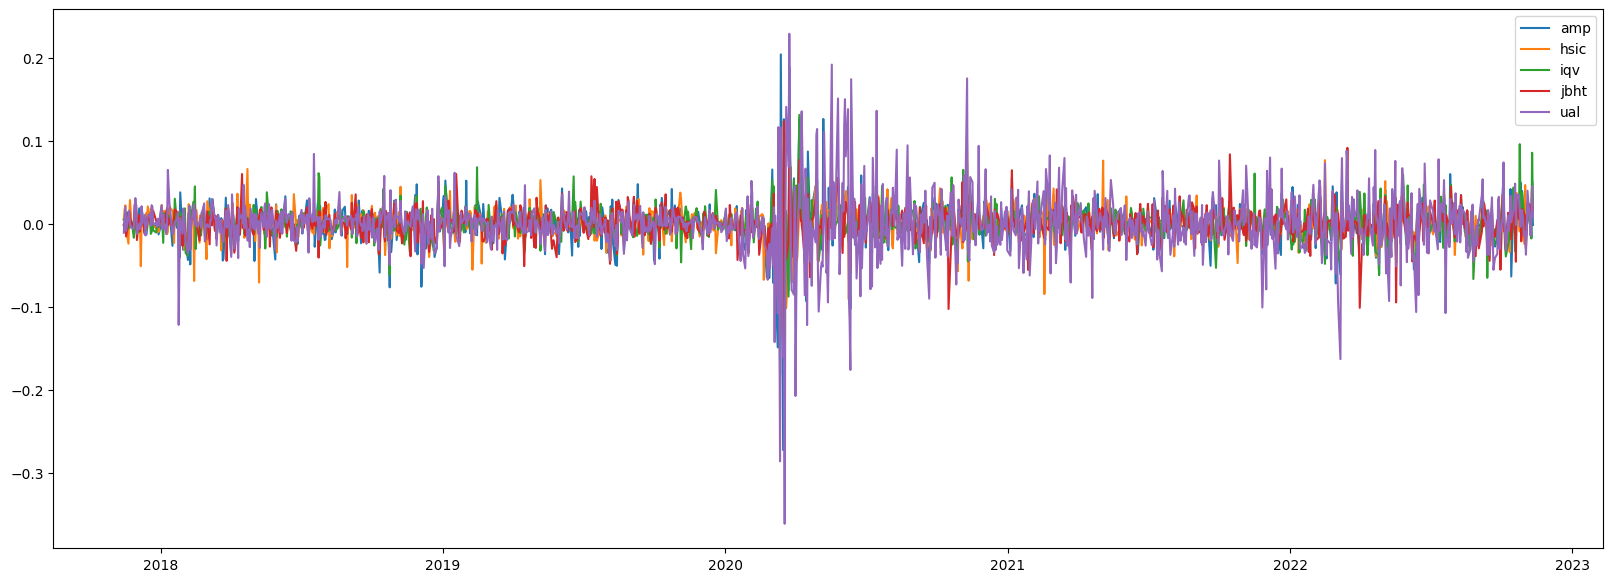

In [43]:
#
plt.subplots(1,1, figsize = (20,7))
for firm, df in companies.items():
    plt.plot(df["Date"],df["LogReturns"], label = firm)
plt.legend()

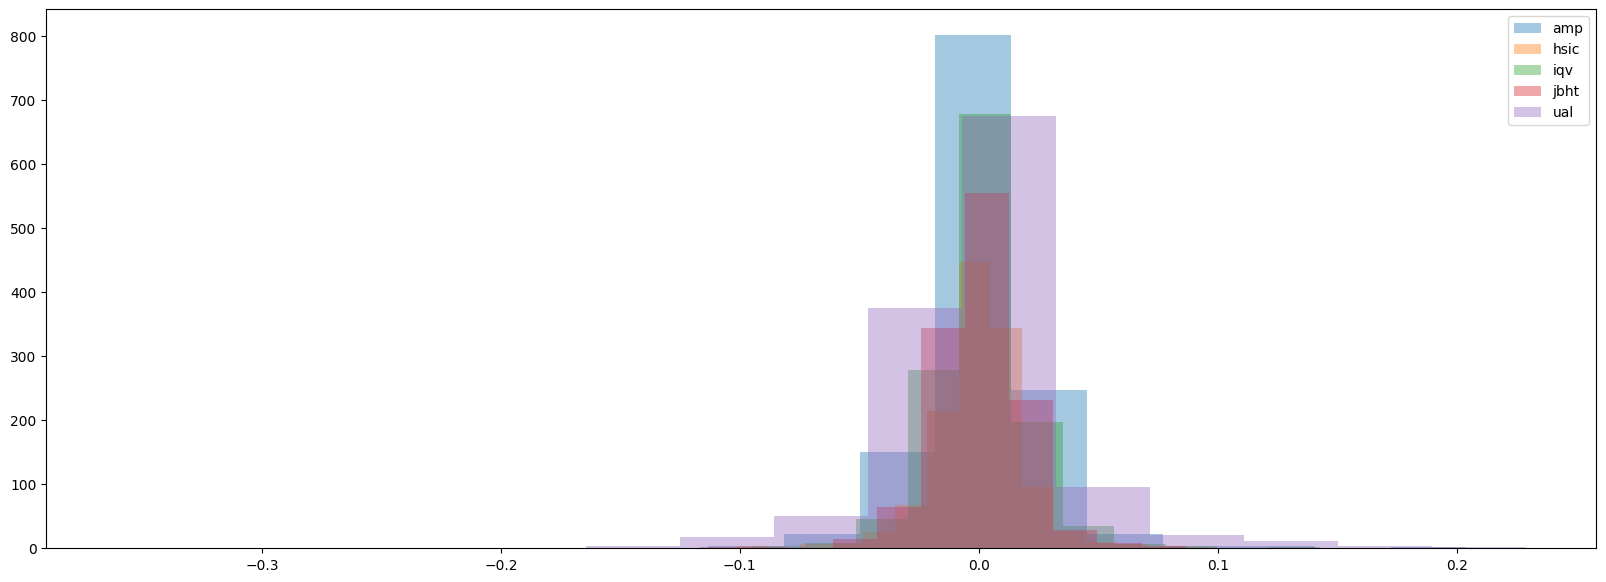

In [47]:
#8
plt.subplots(1,1, figsize = (20,7))
for firm, df in companies.items():
    plt.hist(df["LogReturns"], label = firm, bins= 15, alpha = 0.4)
plt.legend()

In [ ]:
# PART 2

In [57]:
url = "https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"
req = requests.get(url).content
data =pd.read_csv(io.StringIO(req.decode('utf-8')))

In [55]:
#1
notfilledin = data["included"].isnull().sum()
print(f"{notfilledin} companies didn't fill in the date of inclusion")

45 companies didn't fill in the date of inclusion


In [82]:
data = data.dropna(subset="included")
today = datetime.datetime.today()
year = today.year
oldest = data.loc[data["Founded"] == data["Founded"].min(), "Symbol"]
youngest = data.loc[data["Founded"] == data["Founded"].min(), "Symbol"]
print(f"the oldest company's symbol is {oldest[oldest.index[0]]}")
print(f"the oldest company's symbol is {youngest[youngest.index[0]]}")
data["f"] = data["Founded"].apply(lambda x: x.split()[0])
data["founded"] = data["f"].apply(lambda x: x.split("/")[0])
data["founded"] = data["founded"].apply(lambda x: int(x))
data["age"] = year - data["founded"]
print(f"the average age of companies is {round(data['age'].mean(),2)} years")
#for the founded column I only kept the fisrt year values as they were probably the first input therefore the beginning of the company
#cols = [c for c in data["Founded"] if len(c)>4]
#deleting rows if founded is ambiguous (more than one year given)
#data["age"] = data.loc[data["Founded"] != cols].apply(year - data["Founded"])

the oldest company's symbol is BK
the oldest company's symbol is BK
the average age of companies is 66.76 years


(array([], dtype=float64), [])

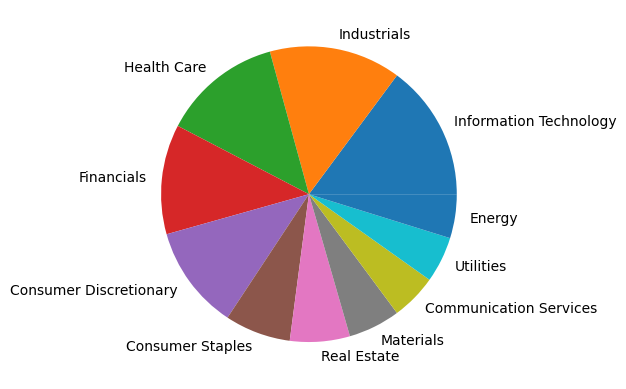

In [106]:
sector = data["GICS_Sector"].value_counts().reset_index()
plt.pie(sector["count"], labels= sector["GICS_Sector"])
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, ' California'),
  Text(1, 0, ' New York'),
  Text(2, 0, ' Texas'),
  Text(3, 0, ' Illinois'),
  Text(4, 0, ' Pennsylvania'),
  Text(5, 0, ' Massachusetts'),
  Text(6, 0, ' Ohio'),
  Text(7, 0, ' North Carolina'),
  Text(8, 0, ' Georgia'),
  Text(9, 0, ' New Jersey'),
  Text(10, 0, ' Virginia'),
  Text(11, 0, ' Florida'),
  Text(12, 0, ' Minnesota'),
  Text(13, 0, ' Connecticut'),
  Text(14, 0, ' Washington'),
  Text(15, 0, ' Michigan'),
  Text(16, 0, ' Tennessee'),
  Text(17, 0, ' Colorado'),
  Text(18, 0, ' Ireland'),
  Text(19, 0, ' Missouri'),
  Text(20, 0, ' Indiana'),
  Text(21, 0, ' Wisconsin'),
  Text(22, 0, ' Arizona'),
  Text(23, 0, ' Maryland'),
  Text(24, 0, ' Nevada'),
  Text(25, 0

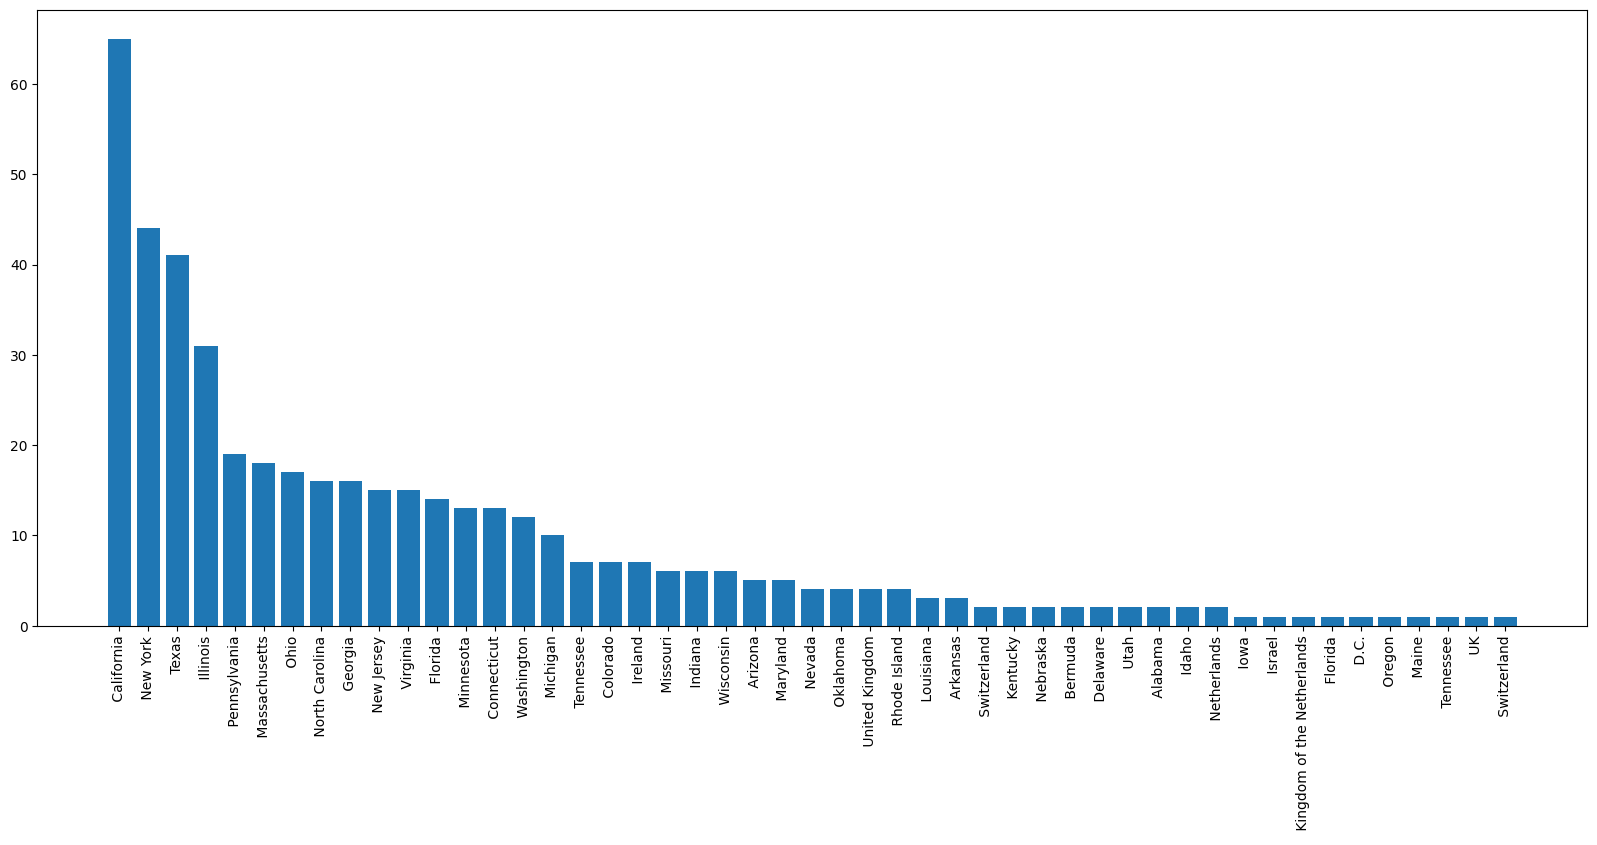

In [107]:
data["state"] = data["hq"].apply(lambda x: x.split(",")[-1])
states = data["state"].value_counts().reset_index()
plt.subplots(1,1, figsize = (20,8))
plt.bar(states["state"], states["count"])
plt.xticks(rotation = 90)

In [96]:
url2 = "https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv"
req2 = requests.get(url2).content
data2 =pd.read_csv(io.StringIO(req2.decode('utf-8')))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Specialty Stores'),
  Text(1, 0, 'Restaurants'),
  Text(2, 0, 'Internet & Direct Marketing Retail'),
  Text(3, 0, 'Casinos & Gaming'),
  Text(4, 0, 'Hotels, Resorts & Cruise Lines'),
  Text(5, 0, 'Homebuilding'),
  Text(6, 0, 'General Merchandise Stores'),
  Text(7, 0, 'Apparel, Accessories & Luxury Goods'),
  Text(8, 0, 'Automobile Manufacturers'),
  Text(9, 0, 'Home Improvement Retail'),
  Text(10, 0, 'Distributors'),
  Text(11, 0, 'Automotive Retail'),
  Text(12, 0, 'Auto Parts & Equipment'),
  Text(13, 0, 'Apparel Retail'),
  Text(14, 0, 'Leisure Products'),
  Text(15, 0, 'Consumer Electronics'),
  Text(16, 0, 'Computer & Electronics Retail'),
  Text(17, 0, 'Home Furnishings'),
  Text(18, 0, 'Housewares & Specialties')])

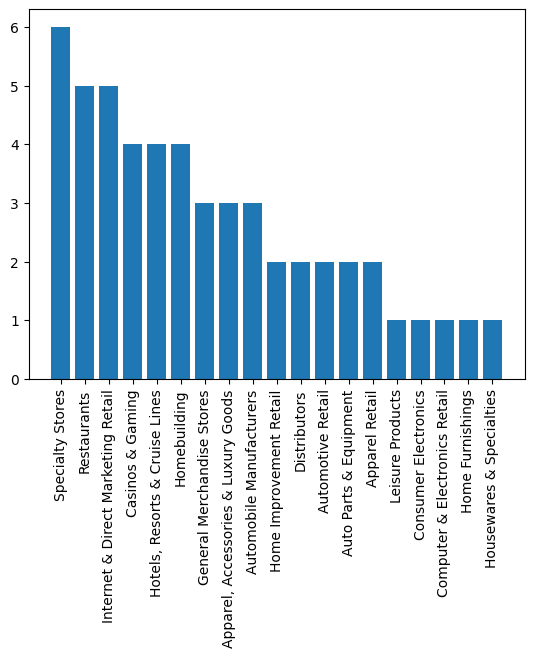

In [109]:
merged = data.merge(data2, on="Symbol")
consdiscre = merged.loc[merged["GICS_Sector"] == "Consumer Discretionary", "subindustry"].value_counts().reset_index()
plt.bar(consdiscre["subindustry"], consdiscre["count"])
plt.xticks(rotation = 90)
